In [19]:
import pandas as pd
import numpy as np
import csv
import os
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS') 
data = np.genfromtxt('new_datas2.csv', delimiter = ',', names = True, dtype = None)
df = pd.DataFrame(data)

In [20]:
df = df.drop(["trip_number", "timestmp_local", "Hour_editing_needed", "Date", "speed_lim1", 
              "Hour", "Minute", "Second", "latitude", "longitude", "ratio", "road_type",
              "algorithm", "lag_speed"], axis = 1)
df['Mode'] = np.where(df['lonG'] >= 0, 'Acceleration', 'Deceleration')
df = df.dropna(axis = 0, how = "all")
rndperm = np.random.permutation(df.shape[0])

In [72]:
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], list(df)[:6] + list(df)[7: 21]].values)
print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.264935
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.238301
[t-SNE] Error after 300 iterations: 1.238301
t-SNE done! Time elapsed: 369.698567152 seconds


In [73]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

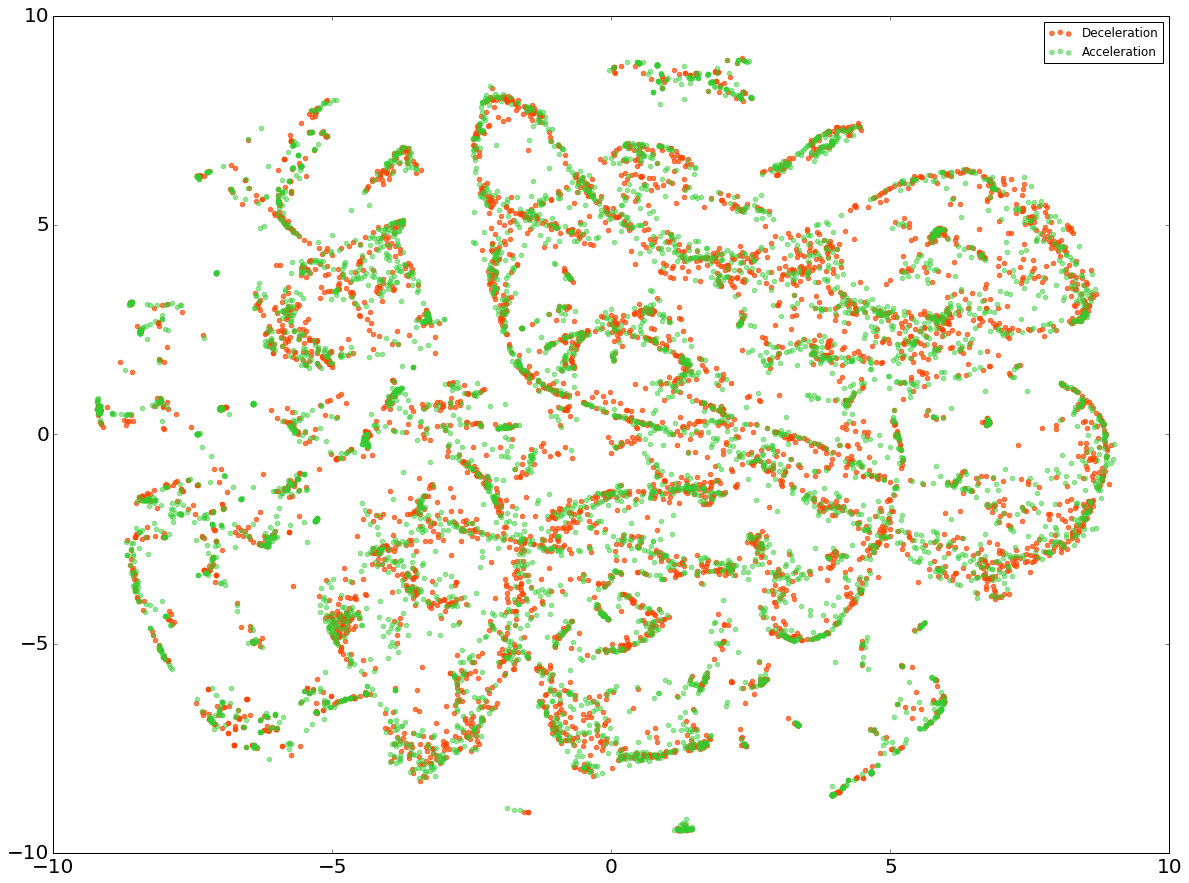

In [79]:
# Display acceleration / deceleration
fig, ax = plt.subplots(figsize = (20, 15))
ax.axis([-10, 10, -10, 10])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Deceleration'), label = "Deceleration", 
           color = "orangered", alpha = 0.7)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Acceleration'), label = "Acceleration", 
           color = "limegreen", alpha = 0.5)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

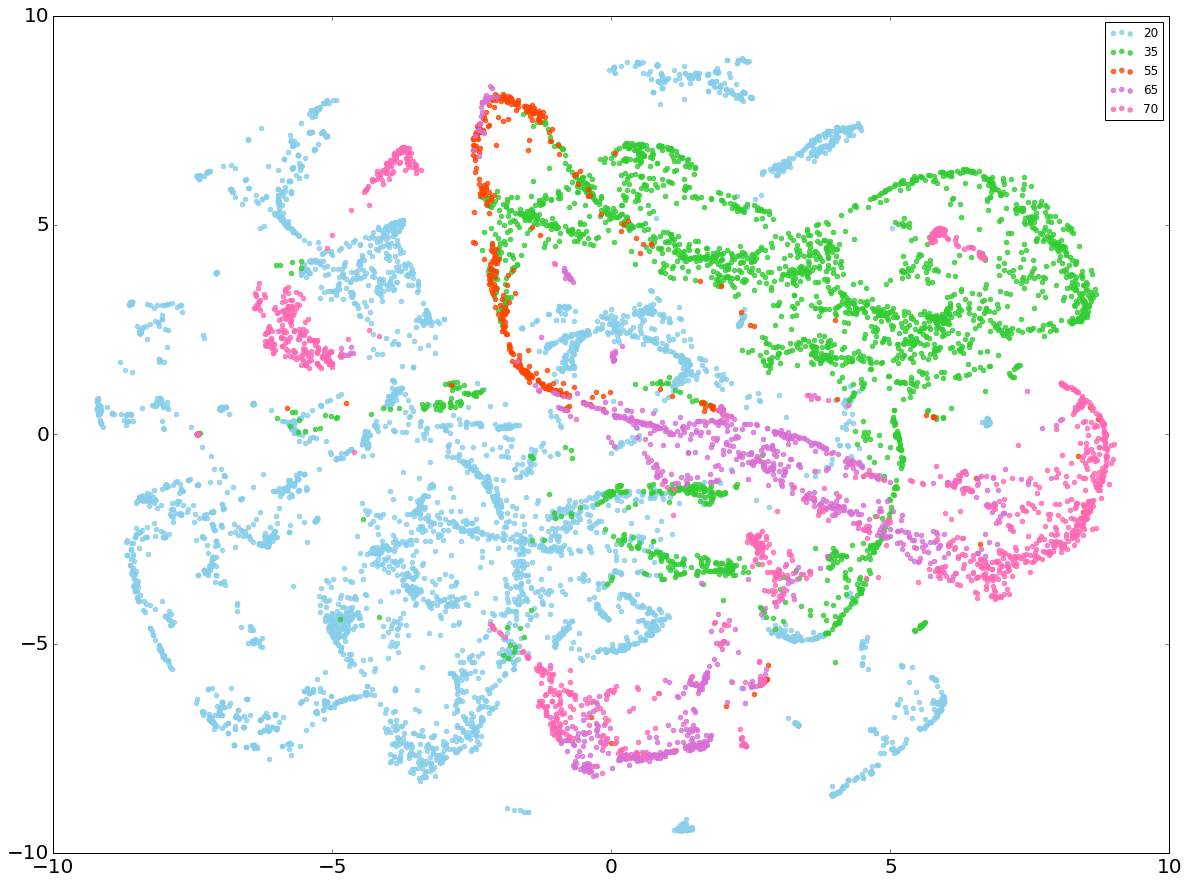

In [81]:
# Display speed_lim2
fig, ax = plt.subplots(figsize = (20, 15))
ax.axis([-10, 10, -10, 10])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 20),
           label = "20", color = "skyblue", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 35), 
           label = "35", color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 55),
           label = "55", color = "orangered", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 65),
           label = "65", color = "orchid", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 70),
           label = "70", color = "hotpink", alpha = 0.8)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [82]:
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], 
                                         list(df[['avg_speed', 'latG', 'lonG', 'ang_speed_gyro', 'avg_latG', 'avg_latG_mag']])].values)
print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.323306
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.220607
[t-SNE] Error after 300 iterations: 1.220607
t-SNE done! Time elapsed: 342.183264017 seconds


In [83]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

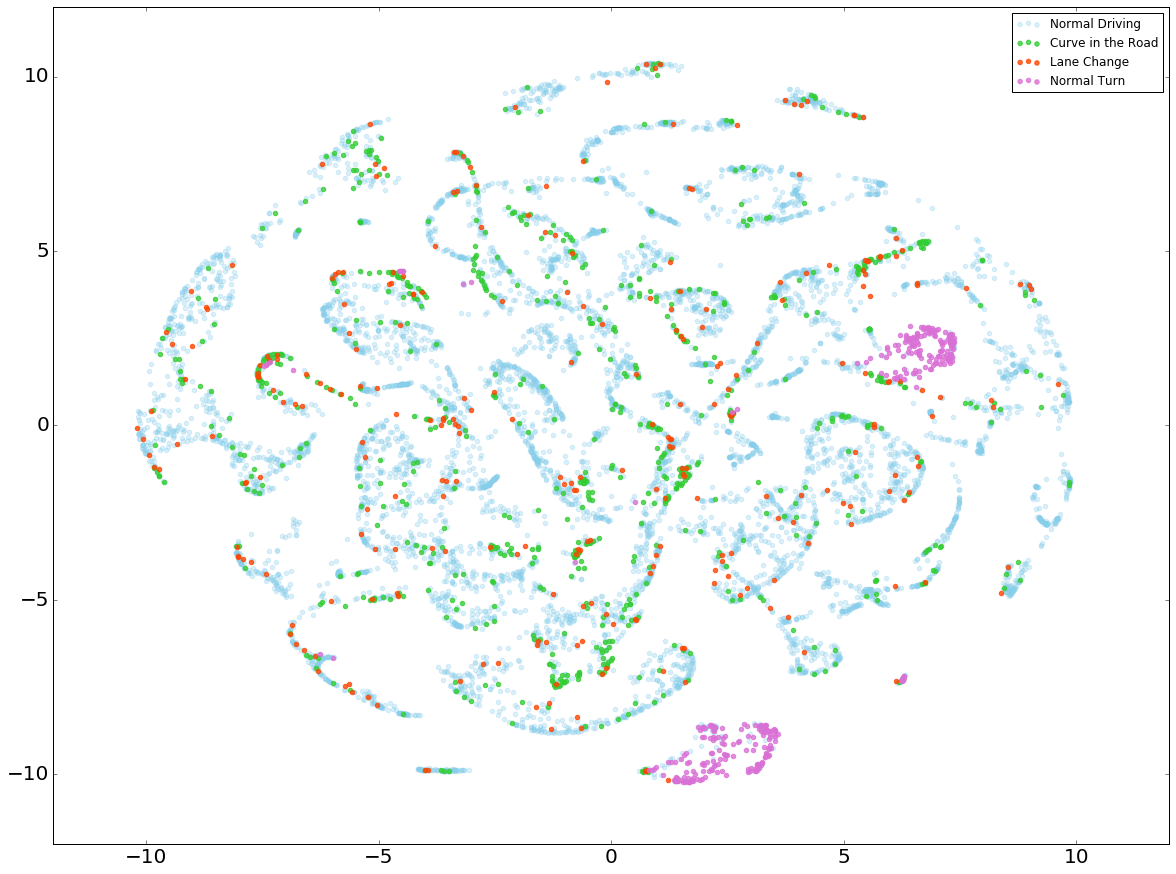

In [86]:
# Display algorithm: Curve in the road, Lane Change, Normal Driving, 
fig, ax = plt.subplots(figsize = (20, 15))
ax.axis([-12, 12, -12, 12])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Driving'] == 1),
           label = "Normal Driving", color = "skyblue", alpha = 0.3)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmCurve_in_the_road'] == 1), 
           label = "Curve in the Road", color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmLane_Change'] == 1),
           label = "Lane Change", color = "orangered", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Turn'] == 1),
           label = "Normal Turn", color = "orchid", alpha = 0.8)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [68]:
list(df_tsne)

['Time',
 'traffic_den',
 'avg_speed',
 'road_typeBusiness_District',
 'road_typeFreeway',
 'road_typeResidential_Road',
 'speed_lim2',
 'stop_ind',
 'stop_grp_cnt',
 'latG',
 'lonG',
 'speed',
 'ang_speed_gyro',
 'lon_delta',
 'inc_mileage',
 'avg_latG',
 'avg_latG_mag',
 'algorithmCurve_in_the_road',
 'algorithmLane_Change',
 'algorithmNormal_Driving',
 'algorithmNormal_Turn',
 'Mode',
 'x-tsne',
 'y-tsne']

In [60]:
list(df)

['Time',
 'traffic_den',
 'avg_speed',
 'road_typeBusiness_District',
 'road_typeFreeway',
 'road_typeResidential_Road',
 'speed_lim2',
 'stop_ind',
 'stop_grp_cnt',
 'latG',
 'lonG',
 'speed',
 'ang_speed_gyro',
 'lon_delta',
 'inc_mileage',
 'avg_latG',
 'avg_latG_mag',
 'algorithmCurve_in_the_road',
 'algorithmLane_Change',
 'algorithmNormal_Driving',
 'algorithmNormal_Turn',
 'Mode']